<h2 style="text-align: center; line-height: 0px;">CHBI 422 / 522</h2>
<h3 style="text-align: center; line-height: 0px;">Spring 2022</h3>
<h3 style="text-align: center; line-height: 0px;">Homework 3</h3>
<h4 style="text-align: center; line-height: 0px;">Due date: April 11, 2022 - 23:59</h4>

<hr>

To complete these homework, you will use Google Colab. If you experience any problems please get in touch with the TA: zabali16@ku.edu.tr

**Submission** <br>
After you are done and passed all the test, please submit this notebook to Blackboard. If you are not getting full points from a test, you may be failing some hidden tests. Think about the edge cases (your code might be working in general, but failing for some special cases). Please do not forget to **save** your work before you submit, and **check** whether you are in the final version.

**Instructions**<br>

$\color{purple}{\small{\text{Visit the RCSB PDB website (https://www.rcsb.org/).
Use RCSB PDB advanced search to find a protein that has the following properties:}}}$

* It should be an enzyme.
* It should have only a single chain.
* It should have a residue count between 40 and 90.
* The experimental method should be X-ray diffraction.
* The protein should have at least four secondary structures.



---



$\color{red}{\text{Essay Part (Total: 20 points)}}$


$\color{purple}{\small{\text{▶ Which PDB ID did you choose? Put the link for your selected protein in the below text box. (3 points)}}}$

[1VIE](https://www.rcsb.org/structure/1VIE)

Link to the X-ray Crystallography article: https://www.nature.com/articles/nsb1195-1018

$\color{purple}{\small{\text{▶ Find the principal article of the paper. What is the function of the protein as you understand from the paper? What is the main emphasis of the paper, with at most three sentences? (3 points)}}}$

The protein I chose is called [Dihydrofolate Reductase]((https://en.wikipedia.org/wiki/Dihydrofolate_reductase). Its main purpose is to catalyze the reduction of 7,8-dihydrofolate  into 5,6,7,8-tetrahydrofolate. This reaction is crucial in the synthesis of purine nucleosides, methionine and other intermediaries.

$\color{purple}{\small{\text{▶ What is the EC number of your enzyme, what does it tell you? (3 points)}}}$


The EC number is 1.5.1.3. First number signifies that this enzyme is an oxidoreductase, meaning that it catalyzes redox reactions. The second number signifies that the enzyme is acting on the CH-NH group of donors, as is the case in this reaction. The third number signifies that the enzyme uses NAD+ or NADP+ as acceptor. Finally, the 4th number is just a position indicator in the list of 1.5.1 enzymes.

$\color{purple}{\small{\text{▶ How many helices and strands exist in the PDB file? (3 points)}}}$


According to the article, the protein has four antiparallel $\beta$-sheets that form a compact $\beta$ barrel.

$\color{purple}{\small{\text{▶ Which year was the structure deposited? (3 points)}}}$


1996.



---



$\color{red}{\text{Calculations Part - A (Total: 40 points)}}$






$\color{purple}{\small{\text{▶ Read in all coordinates and residue types. You can use your code from Homework 2, or write a new one. (You can add new code cells, as you need, below)}}}$


In [ ]:
pip install biopython

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)
from Bio.PDB.PDBParser import PDBParser
import Bio
from Bio.PDB import *
from Bio.PDB.Polypeptide import is_aa
import os
from matplotlib.pyplot import figure
import copy

In [ ]:
!wget -O hw3.pdb https://raw.githubusercontent.com/baranhokelek/CHBI-522/main/1vie.pdb

--2022-04-18 17:27:43--  https://raw.githubusercontent.com/baranhokelek/CHBI-522/main/1vie.pdb
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76140 (74K) [text/plain]
Saving to: ‘hw3.pdb’

hw3.pdb             100%[===================>]  74.36K  --.-KB/s    in 0.01s   

2022-04-18 17:27:43 (6.26 MB/s) - ‘hw3.pdb’ saved [76140/76140]



In [ ]:
parser = PDBParser(PERMISSIVE=1)
structure_id = "1vie"
filename = "hw3.pdb"
structure = parser.get_structure(structure_id, filename)

In [ ]:
model = structure[0]
chain_A = model['A']
residues = chain_A.get_residues()

residue_list = []
coord_list = []
for res in residues:
  if is_aa(res):
    residue_list.append(res.get_resname())
    cdict = {}
    atoms = res.get_atoms()
    for atom in atoms:
      if atom.get_name() in ['N', 'CA', 'C']:
        cdict[atom.get_name()] = atom.get_vector()
    coord_list.append(cdict)

$\color{purple}{\small{\text{▶ Calculate the amino acid composition of the protein (0,5% Ala, etc.)}}}$


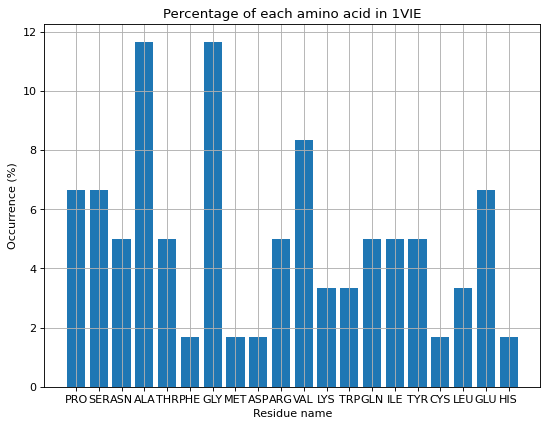

In [ ]:
num_res = len(residue_list)
res_dict = {}
for res in residue_list:
  if res not in res_dict:
    res_dict[res] = 1/num_res * 100
  else:
    res_dict[res] += 1/num_res * 100

figure(figsize=(8, 6), dpi=80)
plt.bar(*zip(*res_dict.items()))
plt.grid()
plt.title("Percentage of each amino acid in 1VIE")
plt.xlabel("Residue name")
plt.ylabel("Occurrence (%)")
plt.show()

$\color{purple}{\small{\text{▶ Using the mole fractions, what is the structural class of your protein.}}}$
$\color{purple}{\scriptsize {\text{Hint: What are the highest probabilities that these amino acids will belong to, i.e. helix/strand or both.}}}$


$\color{purple}{\small{\text{▶ Evaluate all the bond lengths and torsional angles. (i.e., phi, psi, omega)}}}$


In [ ]:
scopy = copy.copy(structure)
scopy.atom_to_internal_coordinates()
bond_angles = []
for r in scopy.get_residues():
    if r.internal_coord:
      bond_angles.append([r.internal_coord.get_angle("psi"),r.internal_coord.get_angle("phi"), r.internal_coord.get_angle("omg")])
bond_angles = np.array(bond_angles)      

$\color{purple}{\small{\text{▶ Draw the Ramachandran plot of the protein.}}}$


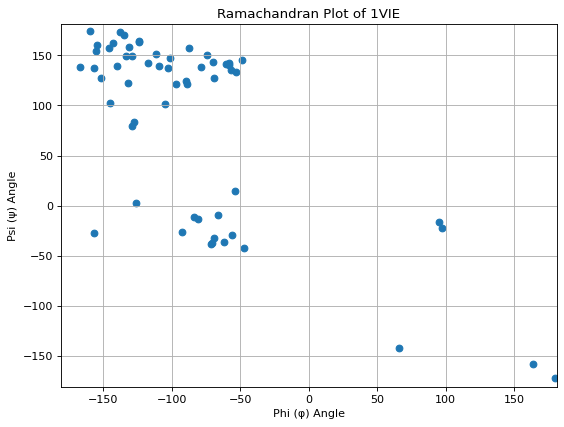

In [ ]:
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(bond_angles[:, 1], bond_angles[:, 0])
plt.xlim(-181, 181)
plt.ylim(-181, 181)
plt.grid()
plt.title("Ramachandran Plot of 1VIE")
plt.xlabel("Phi (φ) Angle")
plt.ylabel("Psi (ψ) Angle")
plt.show()

$\color{purple}{\small{\text{▶ Draw a figure with only alpha carbons displayed using chimera or VMD or your favorite tool. Label the secondary structures and active site. Insert your figure in the cell below.}}}$




---



$\color{red}{\text{Calculations Part - B (Total: 40 points)}}$

$\color{purple}{\small{\text{▶ Calculate the coordination number of each residue, draw residue versus coordination number for the protein.}}}$

$\color{purple}{\small{\text{If i and j are two amino acids, calculate a contact if and only if } abs(i - j) \geq 4.}}$

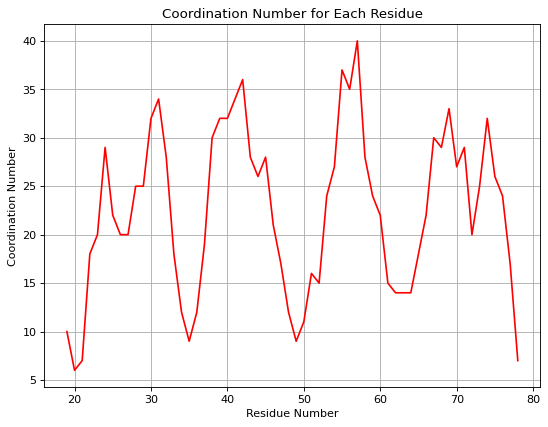

In [ ]:
coord_nums = HSExposure.ExposureCN(model, radius = 12) # radius is an issue

contacts = list(coord_nums.property_dict.values())


plt.figure(figsize=(8, 6), dpi=80)
plt.grid()
plt.title("Coordination Number for Each Residue")
plt.xlabel("Residue Number")
plt.ylabel("Coordination Number")

plt.plot(np.arange(19,len(contacts)+19), contacts, 'r')

$\color{purple}{\small{\text{▶ Draw the contact map of the protein, indicate which secondary element correspond wherein the map. Which secondary structures contact, shown in the map.}}}$



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ipykernel import kernelapp as app


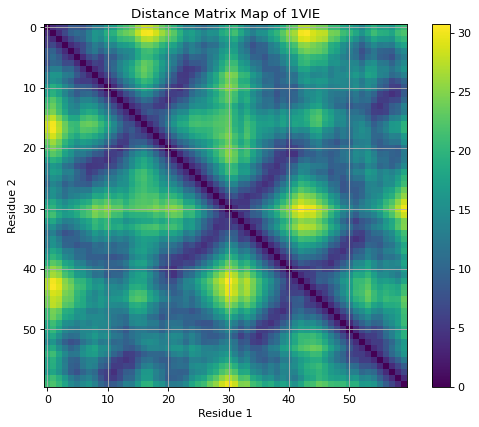

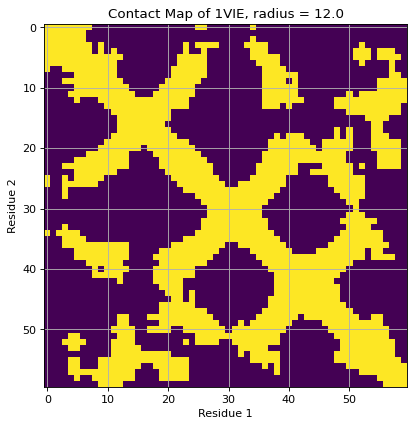

In [ ]:
pdb_code = "1VIE"
pdb_filename = "hw3.pdb"


RADIUS = 12.0

def calc_residue_dist(residue_one, residue_two) :
    """Returns the C-alpha distance between two residues"""
    diff_vector  = residue_one["CA"].coord - residue_two["CA"].coord
    return np.sqrt(np.sum(diff_vector * diff_vector))

def calc_dist_matrix(chain) :
    """Returns a matrix of C-alpha distances between two chains"""
    answer = np.zeros((len(chain), len(chain)), np.float)
    for row, residue_one in enumerate(chain) :
        for col, residue_two in enumerate(chain) :
            answer[row, col] = calc_residue_dist(residue_one, residue_two)
    return answer


structure = Bio.PDB.PDBParser().get_structure(pdb_code, pdb_filename)
model = structure[0]
residues = [res for res in model["A"] if is_aa(res)]


dist_matrix = calc_dist_matrix(residues)
contact_map = dist_matrix < RADIUS

plt.figure(figsize=(8, 6), dpi=80)
plt.imshow(np.transpose(dist_matrix))
plt.grid()
plt.title(f'Distance Matrix Map of 1VIE')
plt.xlabel("Residue 1")
plt.ylabel("Residue 2")
plt.colorbar()
plt.show()


plt.figure(figsize=(8, 6), dpi=80)
plt.imshow(np.transpose(contact_map))
plt.grid()
plt.title(f'Contact Map of 1VIE, radius = {RADIUS}')
plt.xlabel("Residue 1")
plt.ylabel("Residue 2")
plt.show()


$\color{purple}{\small{\text{▶ Find the accessible surface areas of the residues, you might use any of the following programs:}}}$ <br>


* $\color{purple}{\small{\text{FREESASA}}}$ (https://freesasa.github.io/)
* $\color{purple}{\small{\text{GETAREA}}}$ (http://curie.utmb.edu/getarea.html)
* $\color{purple}{\small{\text{MSMS}}}$ (http://mgltools.scripps.edu/packages/MSMS/)
* $\color{purple}{\small{\text{Any other program of your choice}}}$


In [ ]:
pip install freesasa

     |████████████████████████████████| 241 kB 5.2 MB/s 
  Created wheel for freesasa: filename=freesasa-2.1.0-cp37-cp37m-linux_x86_64.whl size=590879 sha256=fb657654deb65f6fc5247f9829c5f766fb2758786c66de9285302da6794511c4
  Stored in directory: /root/.cache/pip/wheels/45/75/76/c7e7d8764b2435b35c5488ccbc6b6990fbcbc650fcd9fadc13
Successfully built freesasa


In [ ]:
import freesasa

structure = freesasa.Structure("hw3.pdb")
result = freesasa.calc(structure)
area_classes = freesasa.classifyResults(result, structure)

print("Total : %.2f A2" % result.totalArea())
for key in area_classes:
    print(key, ": %.2f A2" % area_classes[key])

Total : 3970.38 A2
Polar : 1784.41 A2
Apolar : 2185.96 A2


RESULTS (A^2)

Total   :    3970.38

Apolar  :    2185.96

Polar   :    1784.41

$\color{purple}{\small{\text{▶ Use the following server}}}$ http://expasy.org/tools/protscale.html $\color{purple}{\small{\text{to find the hydrophobicity scale using}}}$ [Kyte & Doolittle](https://web.expasy.org/protscale/pscale/Hphob.Doolittle.html) $\color{purple}{\small{\text{parameters}}}$.

Using the scale Hphob. / Kyte & Doolittle, the individual values for the 20 amino acids are: 

Ala:  1.800  Arg: -4.500  Asn: -3.500  Asp: -3.500  Cys:  2.500  Gln: -3.500  
Glu: -3.500  Gly: -0.400  His: -3.200  Ile:  4.500  Leu:  3.800  Lys: -3.900  
Met:  1.900  Phe:  2.800  Pro: -1.600  Ser: -0.800  Thr: -0.700  Trp: -0.900  
Tyr: -1.300  Val:  4.200  : -3.500  : -3.500  : -0.490

$\color{purple}{\small{\text{▶ Draw the }}}$


$\color{purple}{\small{\text{1. residue versus coordination number}}}$ <br>
$\color{purple}{\small{\text{2. hydrophobicity versus accessible surface area graphs}}}$

$\color{purple}{\small{\text{and see if there is a correlation between them.}}}$



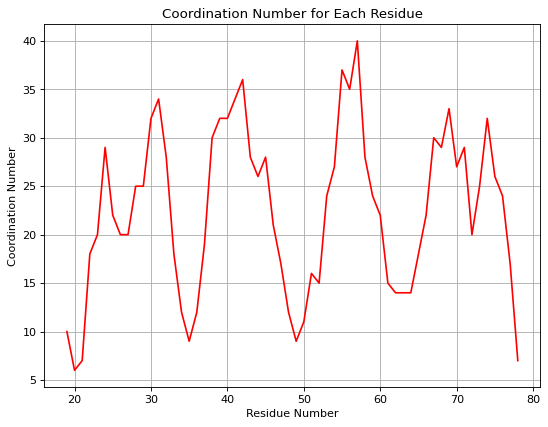

In [ ]:
plt.figure(figsize=(8, 6), dpi=80)
plt.grid()
plt.title("Coordination Number for Each Residue")
plt.xlabel("Residue Number")
plt.ylabel("Coordination Number")

plt.plot(np.arange(19,len(contacts)+19), contacts, 'r')

$\color{purple}{\small{\text{▶ Find the SCOP domain of this protein. We will cover SCOP after folding lectures}}}$


There are 2 SCOP Domains for this protein. Both of them have the name "2RH2 A:21-78", with different SCOP IDs (8024446 and 8036825).



---



**Make sure that you saved your work, download this notebook as .ipynb and upload to Blackboard for submission**